In [2]:
import torch as t
from matplotlib import pyplot as plt
from IPython import display

In [4]:
t.manual_seed(1000)

def get_fake_data(batch_size=8):
    x = t.rand(batch_size, 1) * 20
    y = x * 2 + (1 + t.randn(batch_size, 1)) * 3
    return x, y

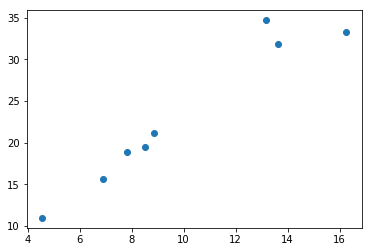

In [6]:
x,y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

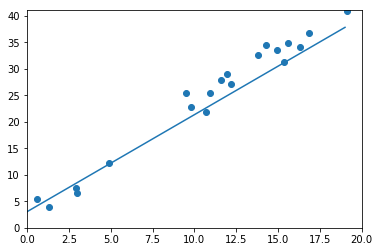

(tensor([[1.8670]]), tensor([[2.9907]]))


In [18]:
w = t.rand(1, 1)
b = t.zeros(1, 1)
lr = 0.001
for ii in range(20000):
    x, y = get_fake_data()
    
    # forward:
    
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # backward:
    dloss = 1
    dy_pred = dloss*(y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # update
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii % 1000 == 0:
        
        display.clear_output(wait=True)
        x = t.arange(0, 20).view(-1, 1)
        x = x.float()
        y = x.mm(w) + b.expand_as(x)
        
        plt.plot(x.numpy(), y.numpy())
        
        x2, y2 = get_fake_data(batch_size=20)
        
        plt.scatter(x2.numpy(), y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
print(w, b)